In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\cities_r2.csv")

In [3]:
data.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [6]:
data.isnull().sum()

X = data[['effective_literacy_rate_total']]

In [7]:
data['effective_literacy_rate_total'].fillna(data['effective_literacy_rate_total'].mean(), inplace=True)

In [8]:
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

In [9]:
scaler = StandardScaler()
data['effective_literacy_rate_total'] = scaler.fit_transform(data[['effective_literacy_rate_total']])

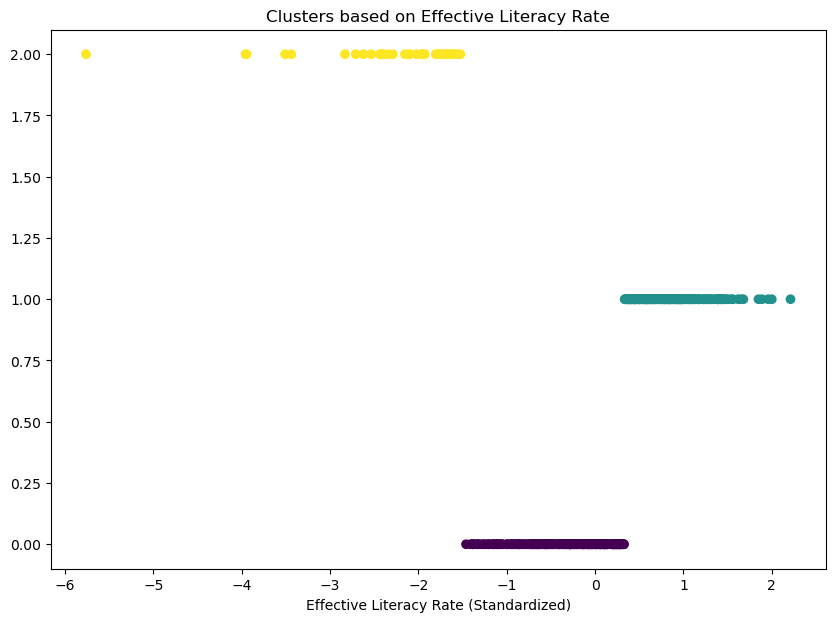

In [10]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster'] = hierarchical_clustering.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data['effective_literacy_rate_total'], data['Cluster'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Effective Literacy Rate (Standardized)')
plt.title('Clusters based on Effective Literacy Rate')
plt.show()
# plt.scatter(data['effective_literacy_rate_total'], [0] * len(data), c=data['Cluster'], cmap='viridis') what is 0*len(data)

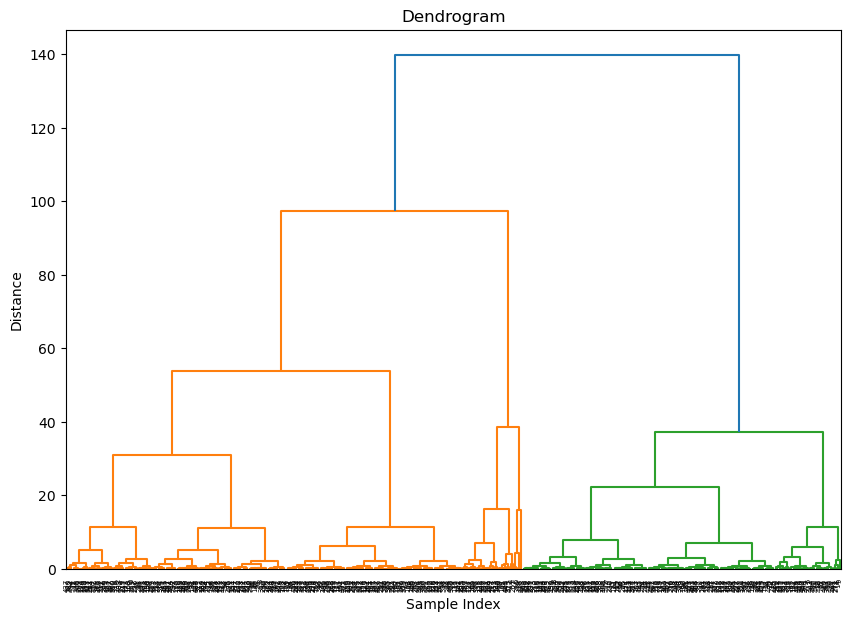

In [11]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()